<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Install

In [1]:
! pip install min-dalle
! nvidia-smi

### Load Model

In [2]:
from min_dalle import MinDalle

model = MinDalle(is_mega=True, is_reusable=True)

initializing MinDalle
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


### Generate Images
Note: a 3x3 grid will not work in the standard runtime

tokenizing text
['Ġcourt']
['Ġsketch']
['Ġof']
['Ġgodzilla']
['Ġon']
['Ġtrial']
text tokens [0, 2634, 4189, 111, 14450, 133, 5167, 2]
encoding text tokens
sampling image tokens
detokenizing image


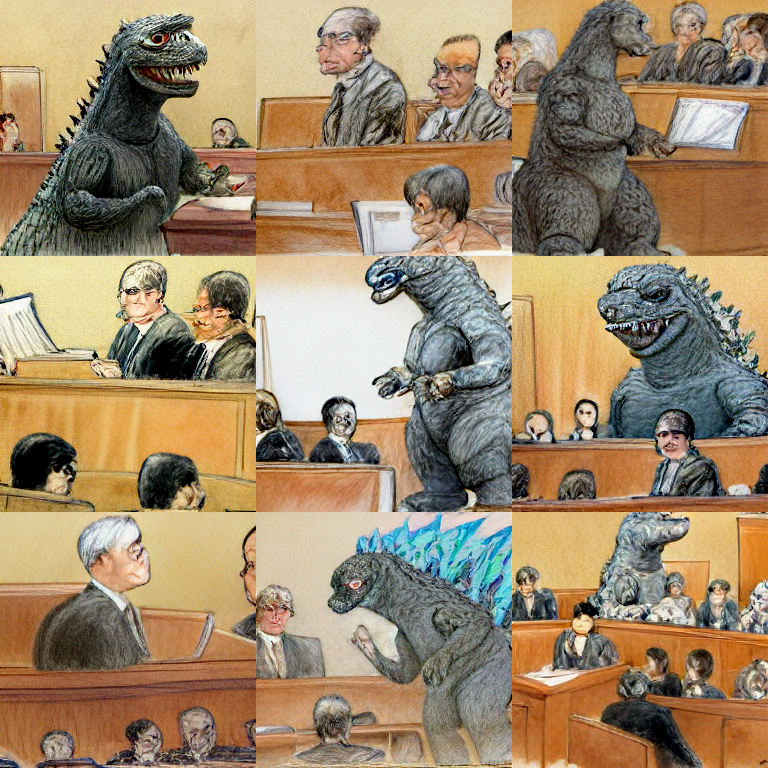

CPU times: user 35.2 s, sys: 28.6 ms, total: 35.2 s
Wall time: 35 s


In [3]:
%%time

text = "court sketch of godzilla on trial" #@param {type:"string"}
seed = 6 #@param {type:"integer"}
grid_size = 2 #@param {type:"integer"}

display(model.generate_image(text, seed, grid_size))